In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import ExtraTreesRegressor

In [251]:
#import data set
df=pd.read_excel("datasets_140442_330428_Data_Train.xlsx")

In [252]:

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [254]:
df.shape

(10683, 11)

In [255]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [256]:
df.dropna(inplace=True)

EDA

In [257]:
# to extract date and month from date-month-year

df['date']=pd.to_datetime(df.Date_of_Journey).dt.day
df['month']=pd.to_datetime(df['Date_of_Journey']).dt.month
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [258]:
df.drop(columns=['Date_of_Journey'],inplace=True)

In [259]:
#Extracting departure hours and min

df['dep_hrs']=pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(columns=['Dep_Time'],inplace=True)

In [260]:
#Extracting arrival hours and min
df['arr_hrs']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['arr_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(columns=['Arrival_Time'],inplace=True)

In [261]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hrs,dep_min,arr_hrs,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [262]:
#Extract the duration 


x=list(df['Duration'])

for i in range(len(x)):
    if len(x[i].split()) != 2:
        if "h" in x[i]:
            x[i]= x[i].strip() + " 0m"   # Adds 0 minute  
        else:
            x[i] = "0h " + x[i]

c=[]
d=[]
            
for i in range(len(x)):
    c.append(int(x[i].split(sep = "h")[0]))    # Extract hours from duration
    d.append(int(x[i].split(sep = "m")[0].split()[-1]))

df["dur_hr"] = c
df["dur_min"]= d

In [263]:

df.drop(["Duration"],axis=1,inplace=True)

categorical data

In [264]:
df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

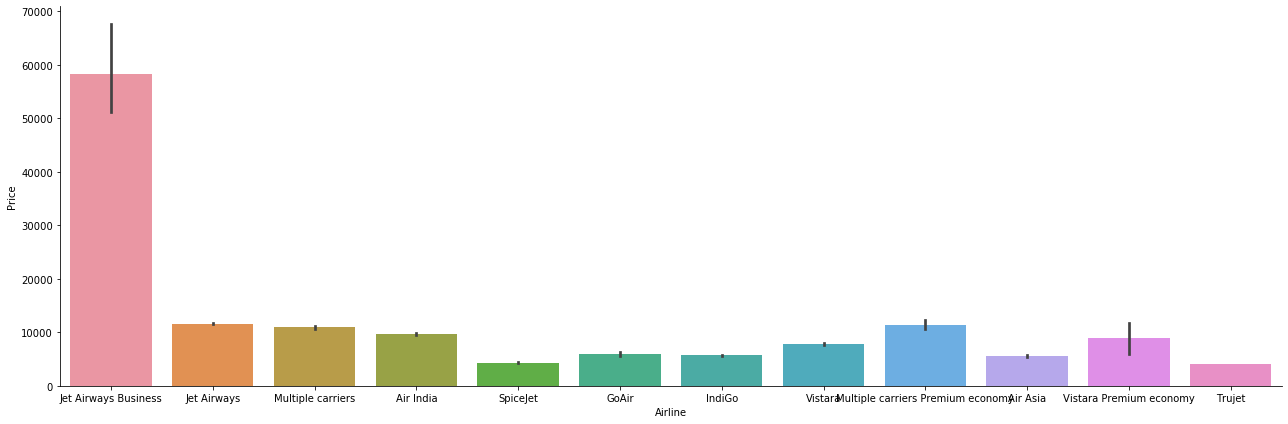

In [265]:
sns.catplot(x='Airline',y='Price',data=df.sort_values("Price",ascending=False),kind='bar',height=6,aspect=3)

In [266]:
airline = df[["Airline"]]

airline = pd.get_dummies(df['Airline'], drop_first= True)

airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [267]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

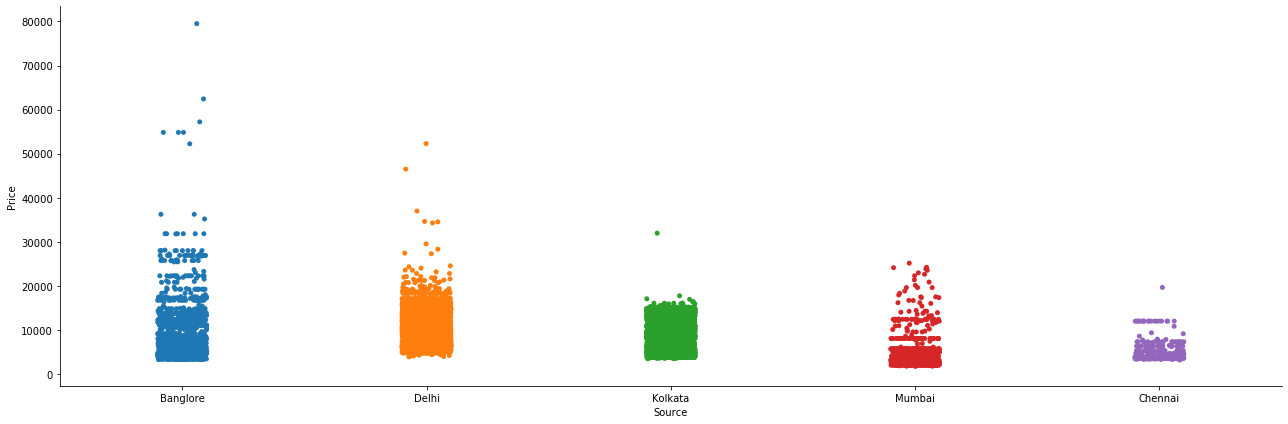

In [268]:
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),height=6,aspect=3)

In [269]:
source=df[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [270]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

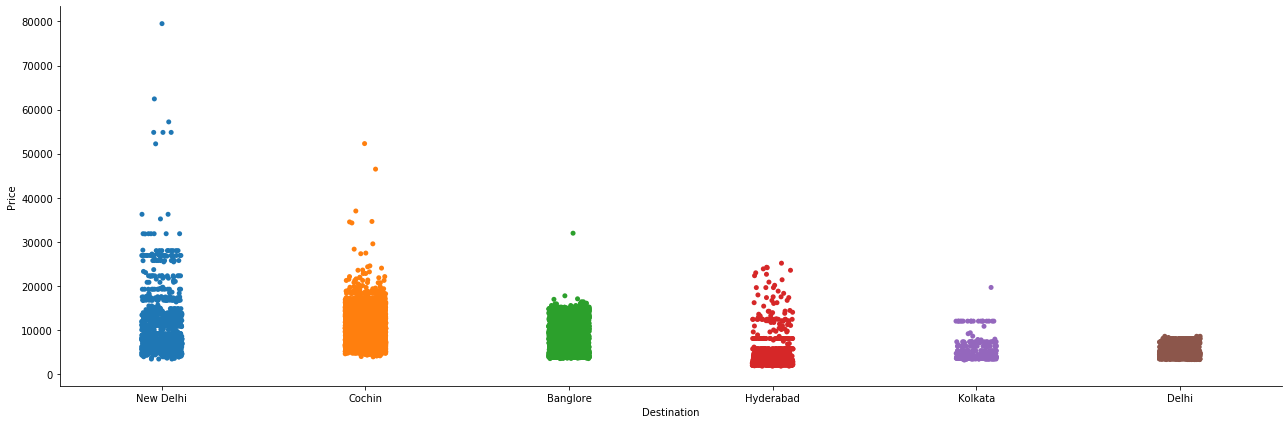

In [271]:
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),height=6,aspect=3)

In [272]:
destination=df[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [273]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [274]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [275]:
df_pre= pd.concat([df, airline, source, destination], axis = 1)


In [276]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [277]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [278]:
df.head()

,Total_Stops,Price,date,month,dep_hrs,dep_min,arr_hrs,arr_min,dur_hr,dur_min
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,5,1,5,50,13,15,7,25
2,2,13882,6,9,9,25,4,25,19,0
3,1,6218,5,12,18,5,23,30,5,25
4,1,13302,3,1,16,50,21,35,4,45


In [279]:
df.shape

(10682, 10)

Test data

In [320]:
test=pd.read_excel("datasets_140442_330428_Test_set.xlsx")

In [321]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [322]:
# preprocessing for the test data

# test info
print("Test info")
print("-"*100)
print(test.info())
print()


#null values
print("Null data info")
print("-"*100)
print(test.isnull().any())

#EDA
# Date_of_Journey
test['date']=pd.to_datetime(test['Date_of_Journey']).dt.day
test['month']=pd.to_datetime(test['Date_of_Journey']).dt.month

# Dep_Time
test['dep_hrs']=pd.to_datetime(test['Dep_Time']).dt.hour
test['dep_min']=pd.to_datetime(test['Dep_Time']).dt.minute

#Arrival_Time
test['arr_hrs']=pd.to_datetime(test['Arrival_Time']).dt.hour
test['arr_min']=pd.to_datetime(test['Arrival_Time']).dt.minute

#Duration
d=test['Duration']

for i in range(len(d)):
    if(len(d[i].split())!=2):
        if 'h' in d[i]:
            d[i]= d[i].strip() + " 0m"
        else:
            d[i]='0h '+d[i]


a=[]
b=[]
for i in range(len(d)):
    x=d[i].split(" ")
    a.append(int(d[i].split(sep = "h")[0]))    # Extract hours from duration
    b.append(int(d[i].split(sep = "m")[0].split()[-1]))

test['dur_hr']=a
test['dur_min']=b 
             
# Categorical data
#Airline
print("Airline")
print("-"*100)
print(test['Airline'].value_counts())
airline=pd.get_dummies(test['Airline'],drop_first=True)
print()

#Source
print("Source")
print("-"*100)
print(test['Source'].value_counts())
source=pd.get_dummies(test['Source'],drop_first=True)
print()

#destination
print("Destination")
print("-"*100)
print(test['Destination'].value_counts())
destination=pd.get_dummies(test['Destination'],drop_first=True)
print()

test.drop(["Date_of_Journey"], axis = 1, inplace = True)
test.drop(["Dep_Time"], axis = 1, inplace = True)
test.drop(["Arrival_Time"], axis = 1, inplace = True)
test.drop(["Duration"], axis = 1, inplace = True)
test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops

test.replace({"1 stop": 1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4 },inplace=True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_pre = pd.concat([test, airline, source, destination], axis = 1)


Test info
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 104.4+ KB
None

Null data info
----------------------------------------------------------------------------------------------------
Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops      

<ipython-input-322-342dfd3175d1>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[i]= d[i].strip() + " 0m"
<ipython-input-322-342dfd3175d1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[i]='0h '+d[i]


Airline
----------------------------------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

Source
----------------------------------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
----------------------------------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyder

In [325]:
test_pre.head()

,Total_Stops,date,month,dep_hrs,dep_min,arr_hrs,arr_min,dur_hr,dur_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [326]:



test_pre.shape

(2671, 28)

In [327]:
test_pre.head()

,Total_Stops,date,month,dep_hrs,dep_min,arr_hrs,arr_min,dur_hr,dur_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [287]:
df_pre.shape

(10682, 35)

In [288]:
df_pre.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'date', 'month', 'dep_hrs', 'dep_min',
       'arr_hrs', 'arr_min', 'dur_hr', 'dur_min', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [289]:
x=df_pre[['Total_Stops', 'date', 'month', 'dep_hrs',
       'dep_min', 'arr_hrs', 'arr_min', 'dur_min', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
x.head()

,Total_Stops,date,month,dep_hrs,dep_min,arr_hrs,arr_min,dur_min,Air India,GoAir,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [290]:
y=df_pre['Price']
y.shape

(10682,)

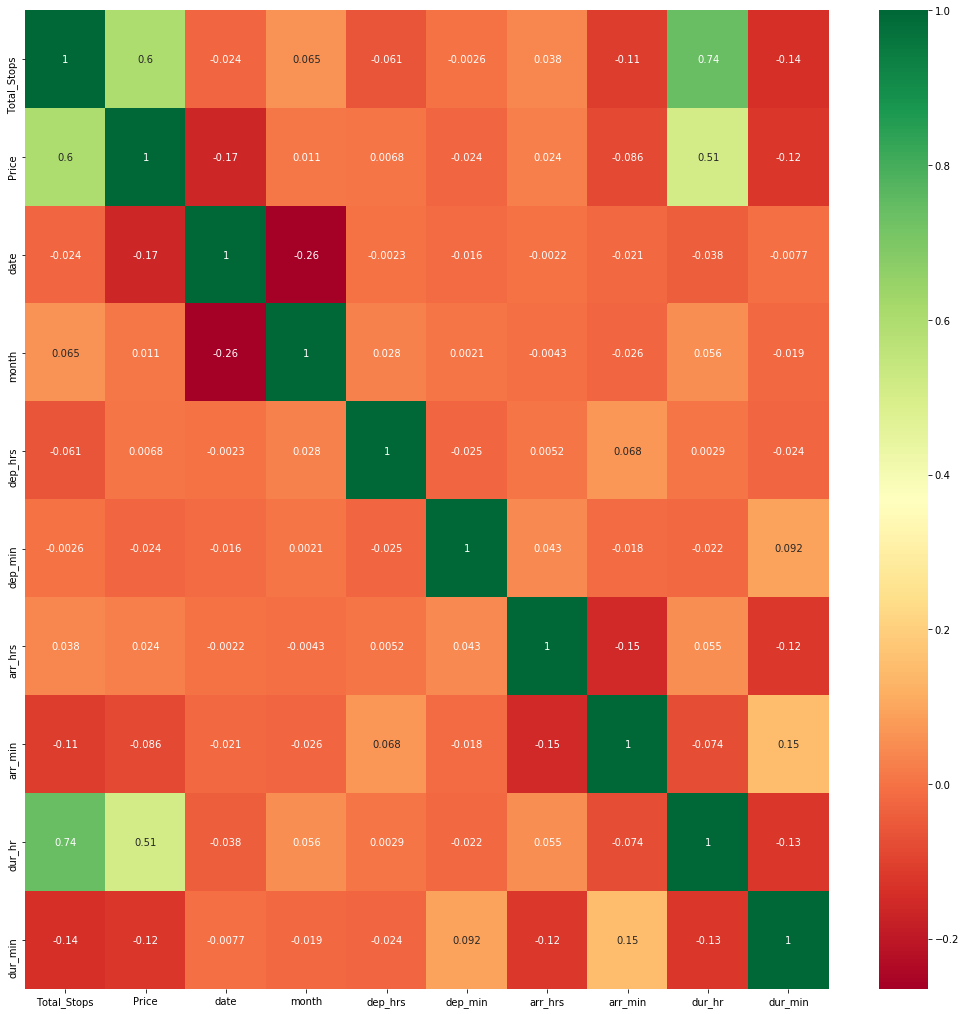

In [291]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True,cmap='RdYlGn')
plt.show()

In [292]:
from sklearn.ensemble import ExtraTreesRegressor

selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [293]:
selection.feature_importances_

array([3.05123714e-01, 1.09010104e-01, 8.54430805e-02, 3.70369814e-02,
       2.45091171e-02, 3.47074040e-02, 2.33768022e-02, 1.96462834e-02,
       1.10434205e-02, 1.80884862e-03, 1.62843902e-02, 1.47657687e-01,
       6.64812812e-02, 1.89627855e-02, 1.08124947e-03, 3.81833380e-03,
       1.65516329e-04, 5.94250190e-03, 1.51526752e-04, 5.32831230e-04,
       1.19013830e-02, 4.10440524e-03, 9.22776560e-03, 1.26596145e-02,
       1.86421194e-02, 7.71014388e-03, 6.26318183e-04, 2.23443903e-02])

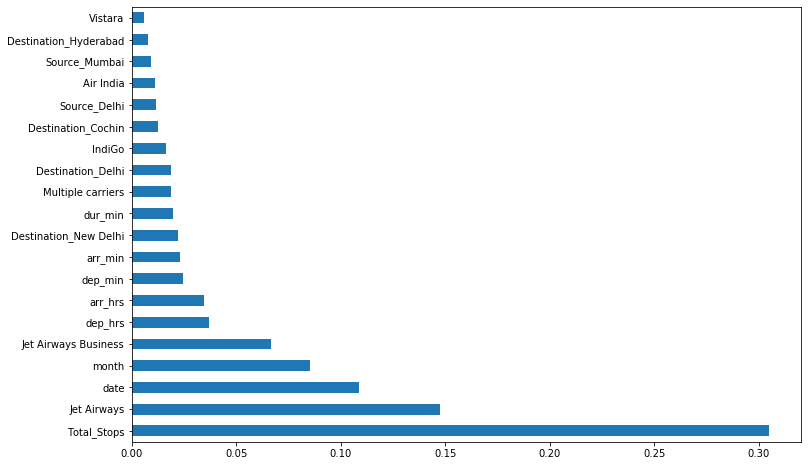

In [294]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


Fitting model using Random Forest

    Split dataset into train and test set in order to prediction w.r.t X_test
    If needed do scaling of data
        Scaling is not done in Random forest
    Import model
    Fit the data
    Predict w.r.t X_test
    In regression check RSME Score
    Plot graph



In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [296]:
from sklearn.ensemble import RandomForestRegressor
re=RandomForestRegressor()
re.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [297]:
y_pred=re.predict(x_test)
re.score(x_test,y_test)

0.8002762337157985

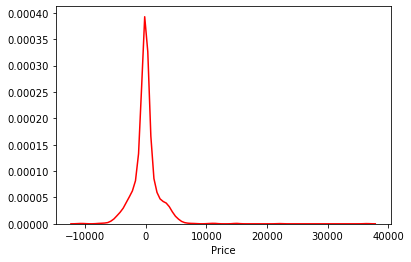

In [298]:
ax1=sns.distplot(y_test-y_pred,hist=False,color='r')


In [299]:
from sklearn import metrics

print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

metrics.r2_score(y_test,y_pred)

MAE 1261.5660375599027
MSE 4686153.673683626
RMSE 2164.7525663880447


0.8002762337157984

Hyper parameter Tuning

In [300]:
from sklearn.model_selection import RandomizedSearchCV

#RandomizedSearchCV
#No of trees in Random forest

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#No of features to consider at every split
max_features=["auto","sqrt"]

#Maximum no of levels in the tree
max_depth=[int(x) for x in np.linspace(5,30,num=8)]

#Minimum no of nodes required to split a node
min_samples_split=[2,10,15,20,30,40,50,60,100]
#Minimum no of nodes required at each leaf node

min_samples_leaf=[1,2,5,10]

In [301]:
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_split}

In [302]:
rf_random=RandomizedSearchCV(estimator=re,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [303]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15, total=   6.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15, total=   8.1s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15, total=   7.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15, total=   6.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=30, max_features=sqrt, max_depth=15, total=   6.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=60, max_features=auto, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=60, max_features=auto, max_depth=5, total=  10.0s
[CV] n_estimators=900, min_

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15, total=   3.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15, total=   4.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15, total=   3.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15, total=   3.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=30, max_features=auto, max_depth=15, total=   3.3s
[CV] n_estimators=1100, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [304]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 60,
 'min_samples_leaf': 15,
 'max_features': 'auto',
 'max_depth': 26}

In [332]:
prediction = rf_random.predict(x_test)

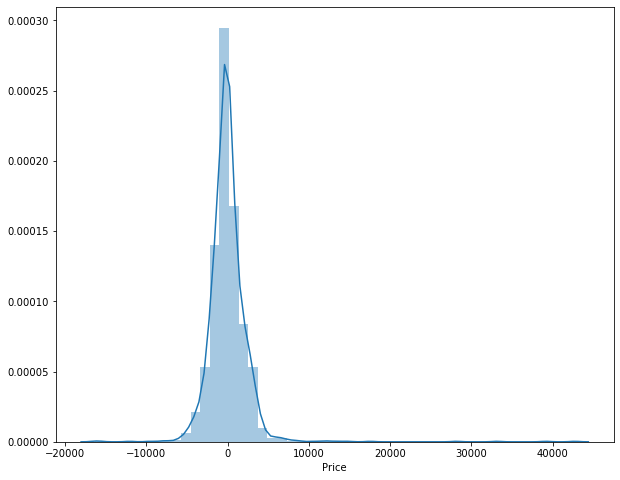

In [333]:
plt.figure(figsize=(10,8))
           
sns.distplot(y_test-prediction)
plt.show()

In [334]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1442.3857057595387
MSE: 6617070.730808642
RMSE: 2572.3667566676104


In [335]:
prediction = rf_random.predict(test_pre)

Save the model and reuse it

In [339]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(re, file)

In [342]:


model = open('flight_rf.pkl','rb')
forest = pickle.load(model)



In [343]:
y_prediction = forest.predict(x_test)

In [344]:
metrics.r2_score(y_test, y_prediction)

0.8002762337157984